# Data cleaning - GVD datatest

This notebook shows all the data cleaning steps. It has to be run once to obtain the cleaned data.

In [1]:
import pandas as pd
import re
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Path to the data folders
raw = './data/RAW/'
clean = './data/CLEAN/'

## Load the datasets

In [3]:
# Load the GVD dataset
GVD_data = pd.read_csv(raw+'GVD_Dataset/2023_gvdDatabase_1_0_country.csv')

# Select only american data 
GVD_usa = GVD_data[GVD_data['country_code'] == 'USA']

In [4]:
# Remove the columns that are no longer needed
columns_to_remove = ["country_code","country_name","country_region", "country_subregion"]
GVD_usa = GVD_usa.drop(columns=columns_to_remove)
GVD_usa_voluntary = GVD_usa[GVD_usa.indicator != "Homicide unintentional"]
GVD_usa_voluntary.to_csv(clean+"GVD_clean.csv")

In [5]:
# Create different dataframe for each population to analyse potential biais in the data
GVD_usa =GVD_data[GVD_data.country_code == "USA"]
GVD_female = GVD_usa[GVD_usa.population == "Female"]
GVD_male = GVD_usa[GVD_usa.population == "Male"]
GVD_all = GVD_usa[GVD_usa.population == "Total"]


/var/folders/2y/_yhdrpzj5kb7clnr0qc0chxc0000gn/T/ipykernel_36862/621659484.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
/var/folders/2y/_yhdrpzj5kb7clnr0qc0chxc0000gn/T/ipykernel_36862/621659484.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


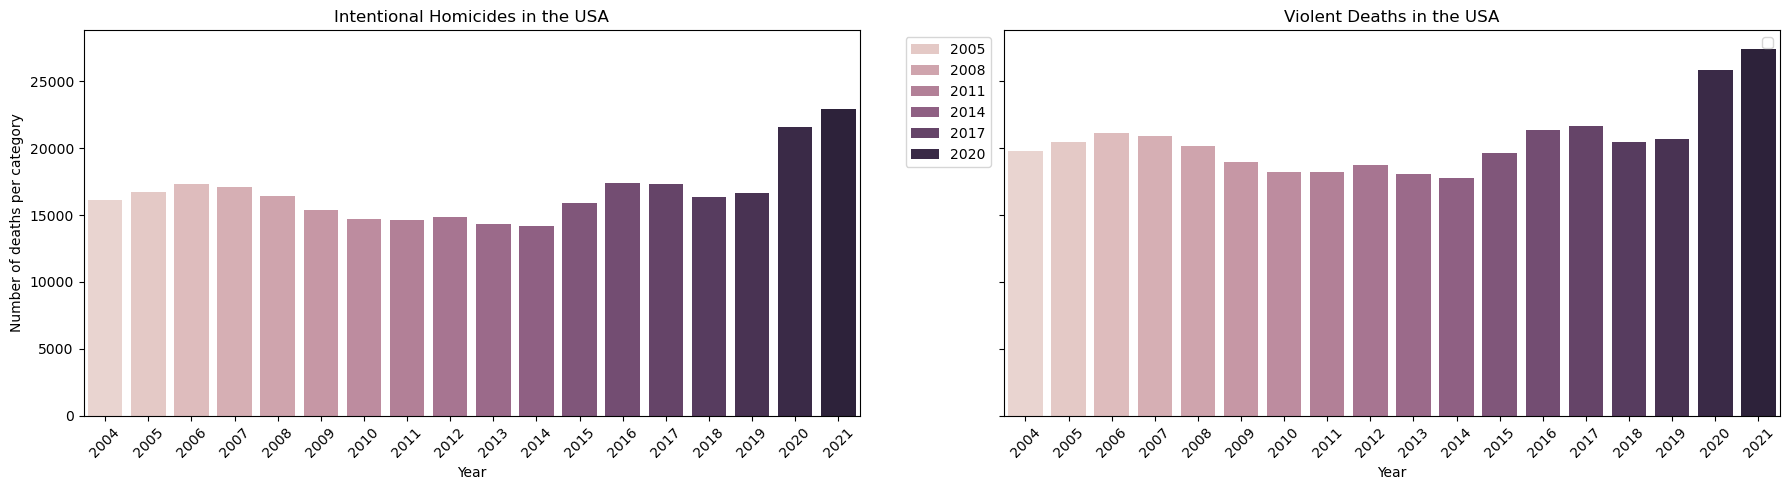

In [6]:
GVD_all_homicide =GVD_all[(GVD_all.mechanism== "All") & (GVD_all.indicator == "Homicide intentional")]
GVD_all_violent_death =GVD_all[(GVD_all.mechanism== "All") & (GVD_all.indicator == "Violent death")]

# Plot the number of inentional homicides and violent per year in the USA
fig, axes = plt.subplots(1,2,figsize=(18, 5),sharey=True)
sns.barplot(ax=axes[0], x="year", y="count",hue="year", data=GVD_all_homicide)
axes[0].set_title("Intentional Homicides in the USA")
axes[0].set_xlabel("Year")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_ylabel("Number of deaths per category")
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

sns.barplot(ax=axes[1], x="year", y="count",hue="year", data=GVD_all_violent_death)
axes[1].set_title("Violent Deaths in the USA")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set_xlabel("Year")
axes[1].legend("")

plt.tight_layout()

We are surprised by the higher number of violent deaths compared to intentional homicide. This will require further investigation. 

Note that entry comment enable to have any idea of the reliability of the data. The following comments were points that we wished to investigate further : 

'Data interpolated using a linear approximation in the 2023 update.',
'Data estimated using a global multiplier in the 2023 update.',
'Data estimated using a subregional average in the 2023 update.',
'Data estimated in the 2023 update.'